In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [9]:
path = 'C:/Users/yuyou/Desktop/'
records = pd.read_excel(path+'CTA_ff_rsi_T_3-绩效统计(2021-06-15 152246).xlsx',sheet_name = '交易记录')
etf_300 = pd.read_csv(path+'etf_300.csv',usecols=['open','close','time_'])

In [10]:
etf_300.head()

,open,close,time_
0,2.551,2.548,2012-05-28 09:31:00
1,2.549,2.548,2012-05-28 09:32:00
2,2.548,2.551,2012-05-28 09:33:00
3,2.551,2.552,2012-05-28 09:34:00
4,2.554,2.551,2012-05-28 09:35:00


In [11]:
records

,1,1.1,1.2,2,2.1,2.2,3,3.1,3.2,4,4.1,4.2,5,5.1,5.2
0,20160215,950,2861.052651,20160215.0,950.0,2861.052651,20160215.0,950.0,2861.052651,20160215.0,950.0,2861.052651,20160215.0,950.0,2861.052651
1,20160219,1120,-2967.172460,20160219.0,1450.0,-2955.061552,20160224.0,1320.0,-2942.950644,20160225.0,1110.0,-2930.839736,20160225.0,1130.0,-2918.728828
2,20160223,1310,2963.391963,20160223.0,1310.0,2963.391963,20160308.0,1000.0,2953.487681,20160308.0,1000.0,2953.487681,20160308.0,1000.0,2953.487681
3,20160224,1320,-2943.914679,20160225.0,1110.0,-2931.898701,20160311.0,940.0,-2946.474268,20160311.0,940.0,-2934.348860,20160328.0,1440.0,-3097.826532
4,20160308,1000,2953.487681,20160308.0,1000.0,2953.487681,20160315.0,1130.0,2981.388770,20160315.0,1130.0,2981.388770,20160401.0,1120.0,3114.259669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,20210331,1010,4953.279176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,20210407,950,-5011.523549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,20210426,1410,5036.882741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,20210506,1050,-5021.761379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
etf_300[9:][::10].head()

,open,close,time_
9,2.552,2.552,2012-05-28 09:40:00
19,2.551,2.550,2012-05-28 09:50:00
29,2.547,2.548,2012-05-28 10:00:00
39,2.545,2.546,2012-05-28 10:10:00
49,2.546,2.549,2012-05-28 10:20:00


In [13]:
etf_300.iloc[0].time_

'2012-05-28 09:31:00'

In [14]:
def get_times(records):
    cols = records.columns
    result = []
    for i in np.arange(0,len(cols),3):
        temp = records[cols[i:(i+2)]].dropna()
        times = []
        for j in range(len(temp)):
            dateStr = str(int(temp.iloc[j][cols[i]]))  # 每3列为一组，第i列为date，第i+1列为time，第i+2列为close
            date = '{}-{}-{}'.format(dateStr[0:4],dateStr[4:6],dateStr[6:])
            timeStr = str(int(temp.iloc[j][cols[i+1]])).zfill(4)
            time = '{}:{}:00'.format(timeStr[0:2],timeStr[2:4])
            
            time_ = '{} {}'.format(date,time)
            times.append(time_)
        
        result.append(times)
    
    return result

In [15]:
get_times(records)

[['2016-02-15 09:50:00',
  '2016-02-19 11:20:00',
  '2016-02-23 13:10:00',
  '2016-02-24 13:20:00',
  '2016-03-08 10:00:00',
  '2016-03-09 11:30:00',
  '2016-03-15 11:30:00',
  '2016-03-23 11:30:00',
  '2016-03-24 09:50:00',
  '2016-03-28 14:10:00',
  '2016-04-01 11:20:00',
  '2016-04-07 11:00:00',
  '2016-04-08 09:50:00',
  '2016-04-18 09:40:00',
  '2016-04-28 13:20:00',
  '2016-05-06 11:10:00',
  '2016-05-09 09:40:00',
  '2016-05-09 14:50:00',
  '2016-05-16 10:10:00',
  '2016-05-18 11:10:00',
  '2016-05-24 13:30:00',
  '2016-05-26 10:20:00',
  '2016-06-08 09:50:00',
  '2016-06-13 14:00:00',
  '2016-06-24 11:10:00',
  '2016-06-24 13:10:00',
  '2016-07-18 10:10:00',
  '2016-07-27 11:30:00',
  '2016-08-12 09:40:00',
  '2016-08-17 11:10:00',
  '2016-08-18 14:30:00',
  '2016-08-25 09:40:00',
  '2016-09-02 09:40:00',
  '2016-09-12 09:40:00',
  '2016-09-26 09:50:00',
  '2016-10-10 09:50:00',
  '2016-10-14 13:10:00',
  '2016-10-31 09:40:00',
  '2016-11-09 10:40:00',
  '2016-12-05 09:40:00',


In [34]:
# df=etf_300, df_=record, records = list of trade times

def run_tradeTime(df, df_next, cash=1000000.0, holding=0, load=0.96, number=1, record=[]):

    asset = cash + holding * (df['close'][0])
    asset_list = []
    trade_list = []
    costPrice = 0.0
    longTime = []
    shortTime = []
    
    Index = 0 # index of records
    for i in np.arange(0,len(df)):
     
        close = df['close'][i]
        openNext = df_next['close'][i]
        
        asset = cash + holding*close
        asset_list.append(asset)
        
        if Index==len(record): 
            continue        
        if df.index[i]==record[Index]:
            Index+=1
            if cash > (load+0.02) * asset:
                etfs = int(load*asset / openNext) # 每次加仓/开仓买入一定比例资产的etf
                longValue = etfs * openNext * 1.0005 # 买入时按卖一价算成本，计0.05%手续费
                cash -= longValue
                
                costPrice = (longValue + holding*costPrice)/(etfs+holding)
                holding += etfs 
                longTime.append(df_next.index[i])
                
            elif holding > 0:
                clearValue= holding * openNext * 0.9995
                profit = clearValue - costPrice*holding
                profitRatio = profit/asset
                cash += clearValue

                holding, costPrice = 0, 0.0

                shortTime.append(df_next.index[i])
                trade_list.append([profit,profitRatio,longTime,shortTime,number])
                longTime, shortTime = [],[]
        
    res = pd.DataFrame(asset_list, columns=['netAsset'], index=df.index)
    tradeRecord = pd.DataFrame(trade_list, columns=['profit','profitRatio','longTime','shortTime','num'])
        
    return res, tradeRecord # return the df of asset


In [32]:
etf_300[10:-1:10]

,open,close,time_
10,2.554,2.552,2012-05-28 09:41:00
20,2.551,2.551,2012-05-28 09:51:00
30,2.549,2.549,2012-05-28 10:01:00
40,2.546,2.546,2012-05-28 10:11:00
50,2.548,2.549,2012-05-28 10:21:00
...,...,...,...
528670,5.119,5.120,2021-06-16 14:11:00
528680,5.116,5.114,2021-06-16 14:21:00
528690,5.114,5.108,2021-06-16 14:31:00
528700,5.105,5.106,2021-06-16 14:41:00


In [33]:
# df为原始数据表，cycles为K线周期

def backtest(df, cycles=10, cash=1000000.0, holding=0, load=0.96, records_=[['2016-01-03']]):
    tmp = df[['open','close']]
    tmp.index = df['time_']
    
    prices = tmp[(cycles-1):-1:cycles]
    prices_next = tmp[cycles:-1:cycles]

    asset = []
    record = []
    times = get_times(records_)
    num = len(times)
    
    for i in range(num):
        temp = run_tradeTime(prices, prices_next, cash/num, holding, load, i+1, times[i])
        asset.append(temp[0])
        record.append(temp[1])
        
    res = pd.concat(asset, axis=1)
    res['sum_asset'] = res.apply(lambda x:x.sum(),axis=1)
    
    netAsset = pd.DataFrame(res['sum_asset'], index=res.index)
    netAsset.columns = ['netAsset']
    
    a = prices['close']/prices['close'][0]
    b = netAsset['netAsset']/netAsset['netAsset'][0]
    Asset = pd.concat([a,b],axis=1)
    
    records = pd.concat(record)
    
    return Asset, records

In [44]:
aaa = backtest(etf_300, cycles=10, cash=10000000.0, holding=0, load=0.96, records_=records)
performance(aaa[0],aaa[1])

,etf_300,策略
return for year,0.113122,0.110955
sigma,0.233048,0.085170
drawback,-0.460989,-0.078871
sharpe_ratio,0.378126,1.009219
MAR_ratio,0.245389,1.406787
win_number,NaN,180.000000
loss_number,NaN,236.000000
win_ratio,NaN,0.432692
win_average,NaN,105099.943226
loss_average,NaN,-38000.767039


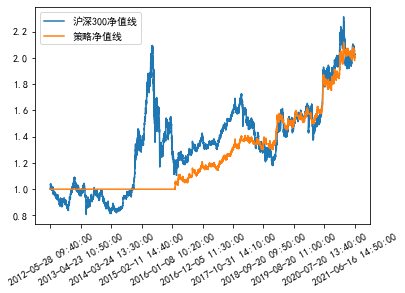

In [45]:
plot_return(aaa[0])

In [43]:
#%%
# plot return
def plot_return(df):
    
    x = np.array(df.index)
    y_etf = np.array(df['close'])
    y_asset = np.array(df['netAsset'])
    
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    plt.plot(x,y_etf,label='沪深300净值线')
    plt.plot(x,y_asset,label='策略净值线')
    plt.xticks(x[::int(len(x)/10)], rotation=30)
    plt.legend()
    

#%%
def get_drawback(df):
    result = []
    for j in range(len(df.columns)):
        tmp = df[df.columns[j]]
        drawback = 0.0
        summit = tmp[0]
        bottom = tmp[0]

        for i in range(1,len(tmp)):
            if tmp[i] < tmp[i-1]:
                if tmp[i] < bottom:
                    bottom = tmp[i]
                    drawback = min(drawback, bottom/summit-1)
            elif tmp[i] > tmp[i-1]:
                if tmp[i] > summit:
                    summit = tmp[i]
                    bottom = tmp[i]            
        result.append(drawback)
    
    return result

In [42]:
# df = backtest(...)[0], record = backtest(...)[1]
def performance(df,record):

    cycle = (pd.Timestamp(df.index[1])-pd.Timestamp(df.index[0])).seconds
    interval = int(4*3600/cycle)  # 相隔的天数
    df_ = df[::interval]
    df_return = (df_ - df_.shift().fillna(1)) / df_.shift().fillna(1)

    return_for_year = (df_.iloc[-1]-df.iloc[0]).values / (len(df_)/242)
    sigma = df_return.std().values * np.sqrt(242)
    drawback = get_drawback(df_)
    sharpe_ratio = (return_for_year - 0.025)/sigma
    MAR_ratio = -return_for_year/drawback
    
    
    s = record['profit']
    win_number = [None, s[s>0].count()]
    loss_number = [None, s[s<0].count()]
    win_ratio = [None, s[s>0].count() / (s[s>0].count() + s[s<0].count())]
    
    win_average = [None, s[s>0].sum() / s[s>0].count()]
    loss_average = [None, s[s<0].sum() / s[s<0].count()]
    profitOverLoss = [None, - s[s>0].sum() / s[s<0].sum()]
    
    stat = [return_for_year,
            sigma,
            drawback,
            sharpe_ratio,
            MAR_ratio,
            
            win_number,
            loss_number,
            win_ratio,
            win_average,
            loss_average,
            profitOverLoss]
    
    result = pd.DataFrame(stat, columns=['etf_300','策略'],
                          index=['return for year',
                                 'sigma',
                                 'drawback',
                                 'sharpe_ratio',
                                 'MAR_ratio',
                                 
                                 'win_number',
                                 'loss_number',
                                 'win_ratio',
                                 'win_average',
                                 'loss_average',
                                 'profits/loss'])
    
    return result

In [ ]:
aaa = backtest(etf_300, cycles=10, cash=10000000.0, holding=0, load=0.96, records_=records)
performance(aaa[0],aaa[1])

In [ ]:
plot_return(aaa[0])

In [49]:
etf_300.time_

0         2012-05-28 09:31:00
1         2012-05-28 09:32:00
2         2012-05-28 09:33:00
3         2012-05-28 09:34:00
4         2012-05-28 09:35:00
                 ...         
528715    2021-06-16 14:56:00
528716    2021-06-16 14:57:00
528717    2021-06-16 14:58:00
528718    2021-06-16 14:59:00
528719    2021-06-16 15:00:00
Name: time_, Length: 528720, dtype: object